In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv', low_memory=False)
test_df = pd.read_csv('test.csv', low_memory=False)

In [3]:
train_df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Fault
0,MP060D,10196,Montgomery County Police,Injury Crash,06-05-2017 16:27,Maryland (State),OLD HUNDRED RD,County,THURSTON RD,12305 SHOREFIELD RD,...,No,No,2005,GMC,TRUCK,NO MISUSE,39.263378,-77.344203,3.6383 7.4233,1
1,MP000X,20080,Montgomery County Police,Injury Crash,02/22/2020 10:00:00 AM,County,JANET RD,County,FLACK ST,NaN,...,No,Yes,2018,FORD,FIESTA,NO MISUSE,39.068913,-77.063227,3.0862 7.324,1
2,MP070N,10103,Montgomery County Police,Property Damage Crash,06-11-2017 8:21,Maryland (State),COLESVILLE RD,Maryland (State),STRUC #15082,NaN,...,No,No,2016,NEW FLYER,TBU,NO MISUSE,38.993578,-77.032718,3.9583 7.3783,0
3,MP130Y,10208,Montgomery County Police,Injury Crash,05-10-2019 7:30,County,PARKLAND DR,County,FRANKFORT DR,NaN,...,No,No,2001,CHEV,SUBURBAN,OTHER,39.083480,-77.086933,"3.84,-70633",1
4,MP770Y,1091,Montgomery County Police,Injury Crash,08-02-2016 17:00,Maryland (State),OLD GEORGETOWN RD,County,MCKINLEY ST,NaN,...,No,No,2013,KIA,RIO,NO MISUSE,38.996942,-77.109168,3.9917 7.0183,0


# Feature selection

1. First removing those features which non important and doesnt make sense for driver to be at fault

In [4]:
train_df = train_df.drop(['Report Number', 'Local Case Number', 'Agency Name', 'Off-Road Description', 'Municipality', 'Person ID', 'Vehicle ID', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems'], axis = 1)

2. Checking the missing values

In [5]:
missing = round((train_df.isnull().sum()/51490)*100, 2)
missing.loc[missing > 0]

Route Type                         9.65
Road Name                          8.74
Cross-Street Type                  9.75
Cross-Street Name                  8.78
Related Non-Motorist              92.92
Collision Type                     0.58
Weather                            7.82
Surface Condition                 11.42
Light                              1.37
Traffic Control                   15.10
Driver Substance Abuse            17.66
Non-Motorist Substance Abuse      93.43
Circumstance                      77.18
Drivers License State              4.91
Vehicle Damage Extent              0.77
Vehicle First Impact Location      0.43
Vehicle Second Impact Location     0.45
Vehicle Body Type                  1.52
Vehicle Movement                   0.38
Vehicle Continuing Dir             2.19
Vehicle Going Dir                  2.16
dtype: float64

Features like Related Non-Motorist, Non-Motorist Substance Abuse, Circumstance have lot of null values, but could be very important for the model to know the situation, so we can check for other feature selection prospective then, in the end we can reach to sensible decision.

3. Feature selection using variance threshold, We are not using sklearn, variance thershold for this since, because that needs data to be integers.

In [266]:
train_df.columns

Index(['ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name',
       'Cross-Street Type', 'Cross-Street Name', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Injury Severity', 'Circumstance',
       'Drivers License State', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Second Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir',
       'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle',
       'Parked Vehicle', 'Latitude', 'Longitude', 'Location', 'Fault'],
      dtype='object')

In [267]:
train_df['Parked Vehicle'].value_counts()

No     49529
Yes     1961
Name: Parked Vehicle, dtype: int64

In [268]:
train_df['Driverless Vehicle'].value_counts()

No         50099
Unknown     1391
Name: Driverless Vehicle, dtype: int64

There is no issue of constant features, with low variance. 

4. Now checking the correlation matrix

In [269]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [270]:
df_select = train_df[['ACRS Report Type', 'Route Type','Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Injury Severity', 'Circumstance',
       'Drivers License State', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Second Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir',
       'Vehicle Going Dir', 'Driverless Vehicle',
       'Parked Vehicle']]

Convert the dtype into category to use categorical function 

In [271]:
for i in df_select.columns:
    df_select[i]=df_select[i].astype('category').cat.codes
    

<ipython-input-271-7bbef74a64c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select[i]=df_select[i].astype('category').cat.codes


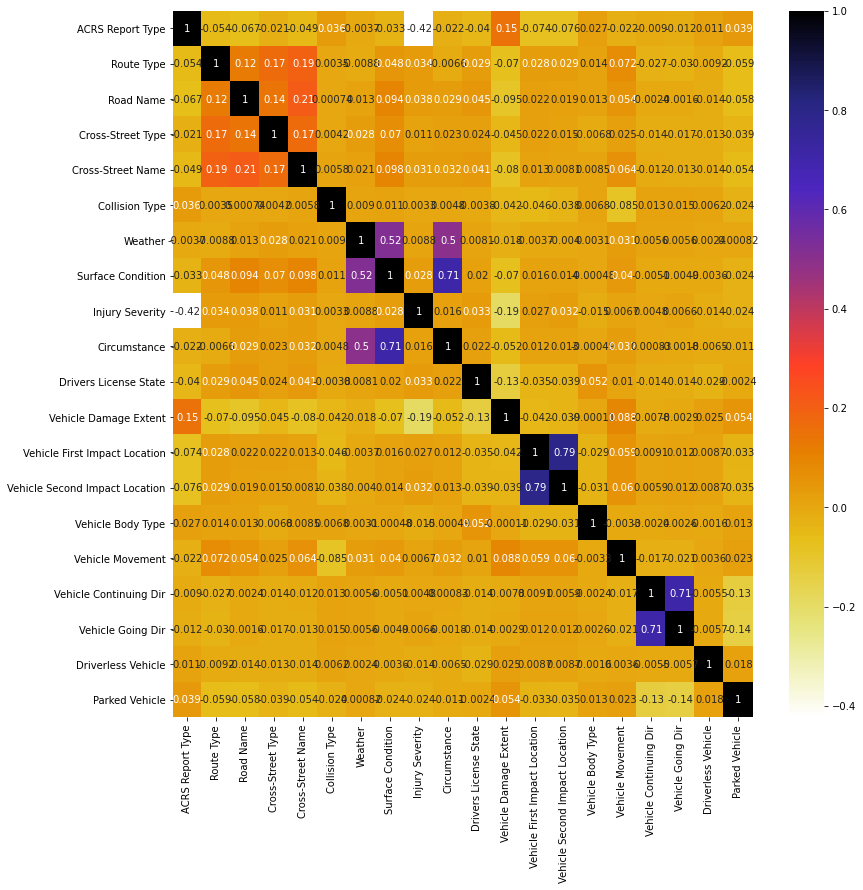

In [272]:
plt.figure(figsize=(13,13))
cor = df_select.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [273]:
train_df = train_df.drop(['Circumstance','Vehicle Body Type', 'Vehicle First Impact Location', 
                          'Vehicle Going Dir','Latitude', 'Longitude', 'Location'], axis=1)

In [274]:
train_df.columns

Index(['ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name',
       'Cross-Street Type', 'Cross-Street Name', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Injury Severity',
       'Drivers License State', 'Vehicle Damage Extent',
       'Vehicle Second Impact Location', 'Vehicle Movement',
       'Vehicle Continuing Dir', 'Speed Limit', 'Driverless Vehicle',
       'Parked Vehicle', 'Fault'],
      dtype='object')

# Encoding Categorical Value

In [275]:
from category_encoders import TargetEncoder

In [276]:
def target_enoder(column):
    encoder = TargetEncoder()
    train_df[column] = encoder.fit_transform(train_df[column], train_df['Fault'])
    return train_df[column]

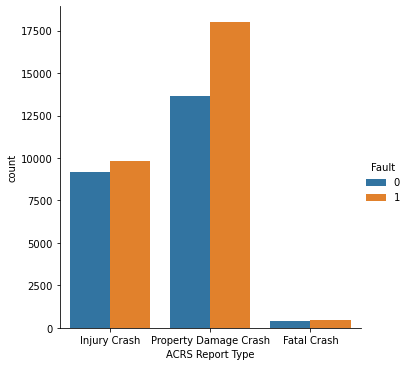

In [277]:
sns.catplot(x='ACRS Report Type', hue='Fault', kind='count', data= train_df)

In [278]:
#label Encoding
train_df['ACRS Report Type'] = train_df['ACRS Report Type'].astype('category').cat.codes

In [279]:
train_df["Crash Date/Time"]= pd.to_datetime(train_df["Crash Date/Time"])
train_df['year']= train_df['Crash Date/Time'].dt.year
train_df['month']= train_df['Crash Date/Time'].dt.month
train_df['day']= train_df['Crash Date/Time'].dt.day
train_df['hour'] = train_df['Crash Date/Time'].dt.hour
train_df['minute'] = train_df['Crash Date/Time'].dt.minute
train_df['day_of_week'] = train_df['Crash Date/Time'].dt.dayofweek

In [280]:
train_df = train_df.drop('Crash Date/Time',axis= 1)

## Route type and cross street type have same name so given same value

In [281]:
#Freqency Encoding
train_df['Route Type'] = train_df['Route Type'].fillna(0)
label = train_df['Route Type'].value_counts().to_dict()
replace_route_type = {'Route Type' : {k: v for k,v in zip(label,list(range(1,len(label)+1)))}}
train_df = train_df.replace(replace_route_type)

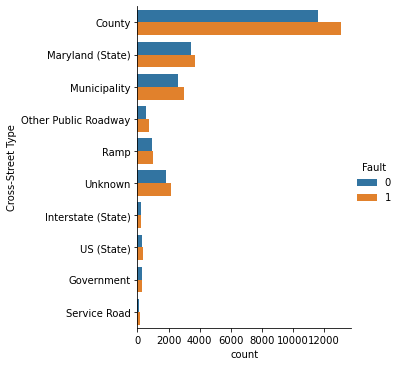

In [282]:
sns.catplot(y='Cross-Street Type', hue='Fault', kind='count', data= train_df)

In [283]:
train_df['Cross-Street Type'] = train_df['Cross-Street Type'].fillna(0)
label = train_df['Cross-Street Type'].value_counts().to_dict()
replace_cross_street_type = {'Cross-Street Type' : replace_route_type['Route Type'] }
train_df = train_df.replace(replace_cross_street_type)

In [284]:
#Freqency Encoding
train_df['Road Name'] = train_df['Road Name'].fillna(0)
label = train_df['Road Name'].value_counts().to_dict()
replace_road_name = {'Road Name' : {k: v for k,v in zip(label,list(range(1,len(label)+1)))}}
train_df = train_df.replace(replace_road_name)

In [285]:
#Freqency Encoding
train_df['Cross-Street Name'] = train_df['Cross-Street Name'].fillna(0)
label = train_df['Cross-Street Name'].value_counts().to_dict()
replace_cross_street_name = {'Cross-Street Name' : {k: v for k,v in zip(label,list(range(1,len(label)+1)))}}
train_df = train_df.replace(replace_cross_street_name)

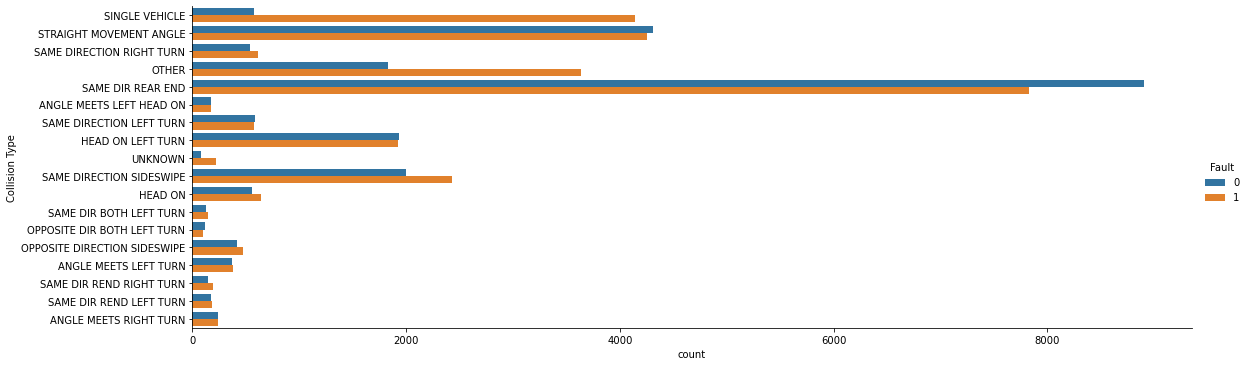

In [286]:
sns.catplot(y='Collision Type', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [287]:
train_df['Collision Type'] = target_enoder('Collision Type')

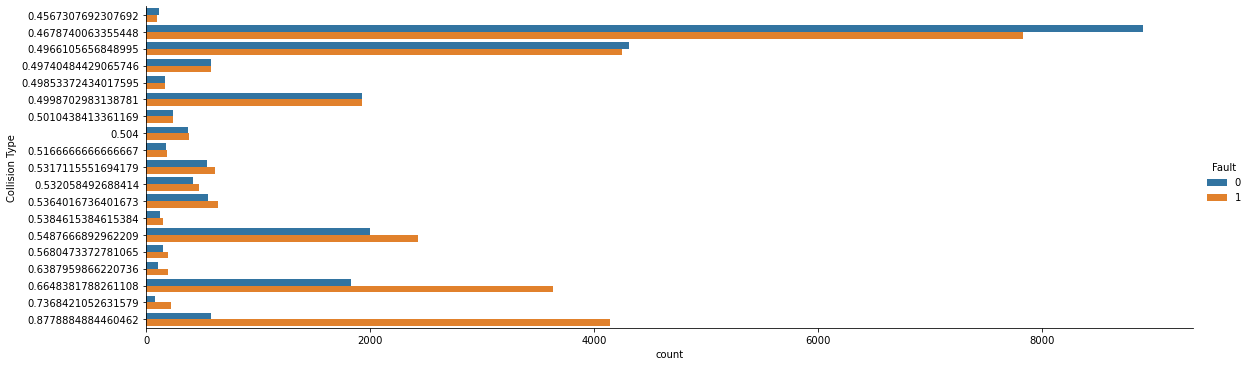

In [288]:
sns.catplot(y='Collision Type', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

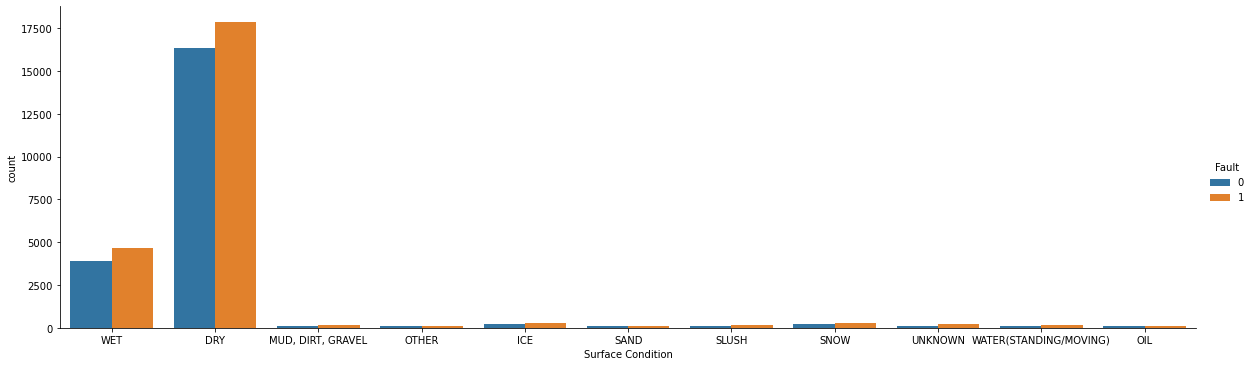

In [289]:
sns.catplot(x='Surface Condition', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [294]:
#Freqency Encoding
#Freqency Encoding
train_df['Surface Condition'] = train_df['Surface Condition'].fillna(0)
label = train_df['Surface Condition'].value_counts().to_dict()
replace_surface_condition = {'Surface Condition' : {k: v for k,v in zip(label,list(range(1,len(label)+1)))}}
train_df = train_df.replace(replace_surface_condition)

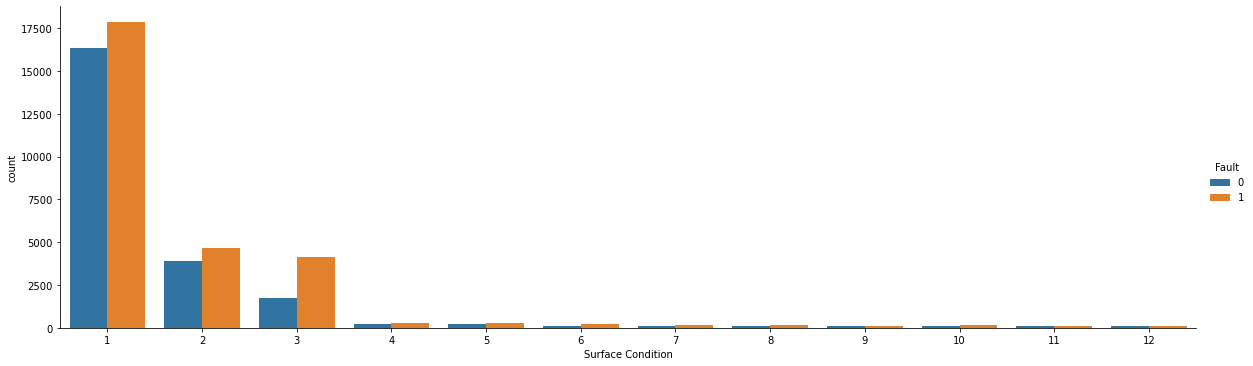

In [295]:
sns.catplot(x='Surface Condition', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [ ]:
sns.catplot(x='Light', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [ ]:
sns.catplot(x='Traffic Control', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

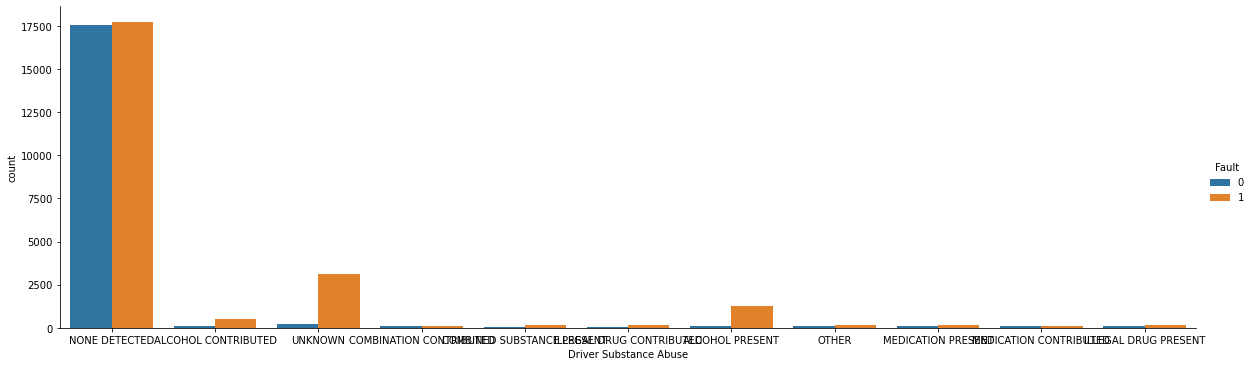

In [6]:
sns.catplot(x='Driver Substance Abuse', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [ ]:
sns.catplot(x='Non-Motorist Substance Abuse', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [ ]:
sns.catplot(x='Injury Severity', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [ ]:
sns.catplot(x='Drivers License State', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [ ]:
sns.catplot(x='Vehicle Damage Extent', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [ ]:
sns.catplot(x='Vehicle First Impact Location', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)

In [ ]:
sns.catplot(x='Vehicle Second Impact Location', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)


In [ ]:
sns.catplot(x='Vehicle Movement', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)


In [ ]:
sns.catplot(x='Vehicle Continuing Dir', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)


In [ ]:
sns.catplot(x='Speed Limit', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)


In [ ]:
sns.catplot(x='Driverless Vehicle', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)


In [ ]:
sns.catplot(x='Parked Vehicle', hue='Fault', kind='count', data= train_df, height= 5, aspect=20/6)


In [ ]:
train_df= train_df[['ACRS Report Type', 'Crash Date/Time', 'Route Type','Cross-Street Type', 'Related Non-Motorist',
       'Collision Type', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Injury Severity', 'Vehicle Damage Extent', 'Vehicle Second Impact Location', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Speed Limit', 'Fault']]

In [ ]:
len(train_df.columns)

In [ ]:
missing = round((train_df.isnull().sum()/51490)*100, 2)
missing.loc[missing > 0]

In [ ]:
train_df.info()

In [ ]:
test_df.describe()